In [122]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from thinkdsp import decorate
from thinkdsp import SawtoothSignal
from thinkdsp import TriangleSignal
from thinkdsp import SquareSignal
from thinkdsp import Wave
from thinkdsp import CubicSignal
from thinkdsp import zero_pad

Упражнение 9.1

Нарастающая сумма для периодического сигнала:

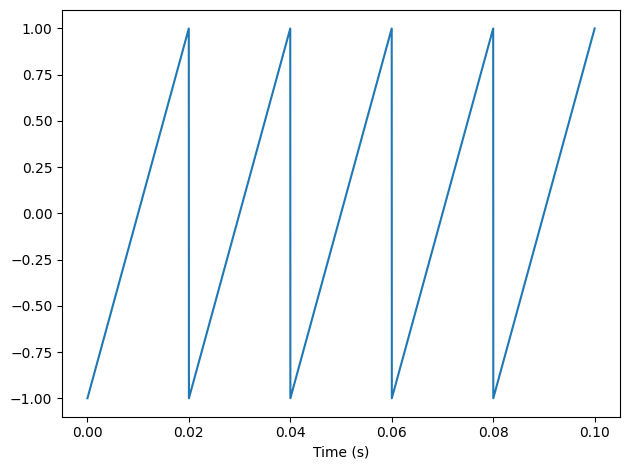

In [123]:
in_waveSaw = SawtoothSignal(freq = 50).make_wave(duration = 0.1, framerate = 44100)
in_waveSaw.unbias()
in_waveSaw.plot()
decorate(xlabel = 'Time (s)')

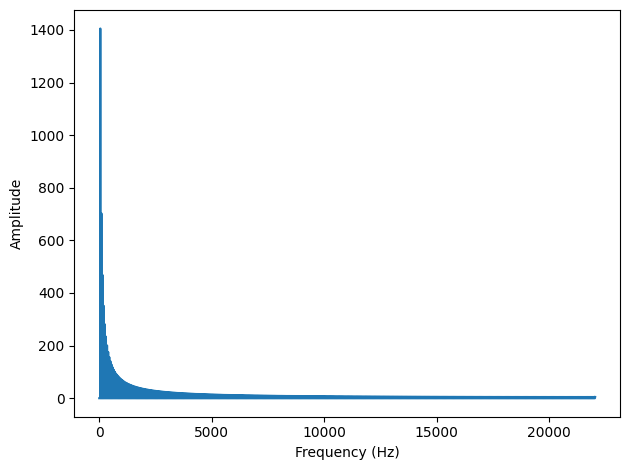

In [124]:
in_spectrumSaw = in_waveSaw.make_spectrum()
in_spectrumSaw.plot()
decorate(xlabel = 'Frequency (Hz)', ylabel = 'Amplitude')

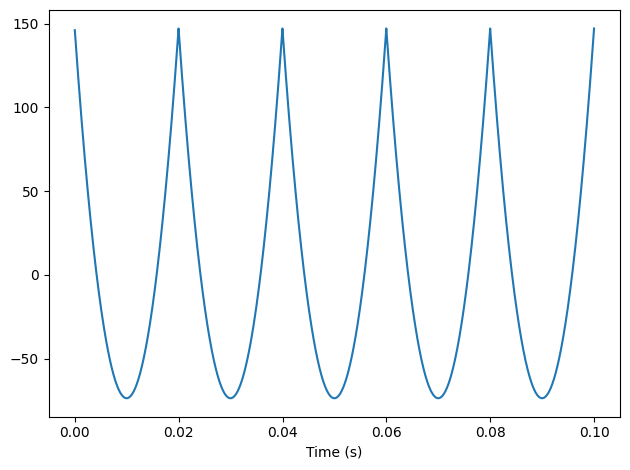

In [125]:
out_waveSaw = in_waveSaw.cumsum()
out_waveSaw.unbias()
out_waveSaw.plot()
decorate(xlabel = 'Time (s)')

Нарастающая сумма для непериодических данных Facebook:

In [126]:
data = pd.read_csv('FB_2.csv', parse_dates = [0])
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400
1,2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700
2,2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600
3,2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000
4,2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200
...,...,...,...,...,...,...,...
1972,2020-03-23,149.660004,152.309998,142.250000,148.100006,148.100006,29830800
1973,2020-03-24,155.210007,161.309998,152.570007,160.979996,160.979996,30440400
1974,2020-03-25,158.919998,162.990005,153.059998,156.210007,156.210007,35184300
1975,2020-03-26,158.250000,164.000000,157.020004,163.339996,163.339996,26556800


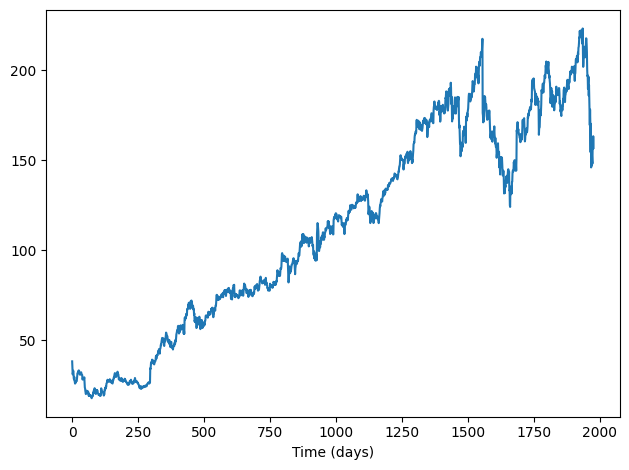

In [127]:
in_waveFB = Wave(data['Close'], data.index, framerate = 1)
in_waveFB .plot()
decorate(xlabel = 'Time (days)')

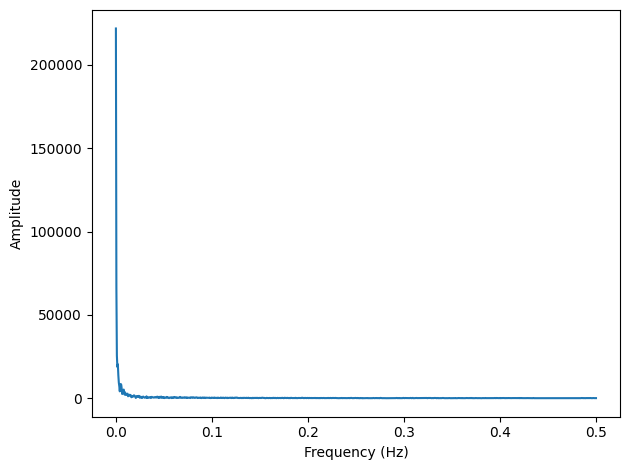

In [128]:
in_spectrumFB = in_waveFB.make_spectrum()
in_spectrumFB.plot()
decorate(xlabel = 'Frequency (Hz)', ylabel = 'Amplitude')

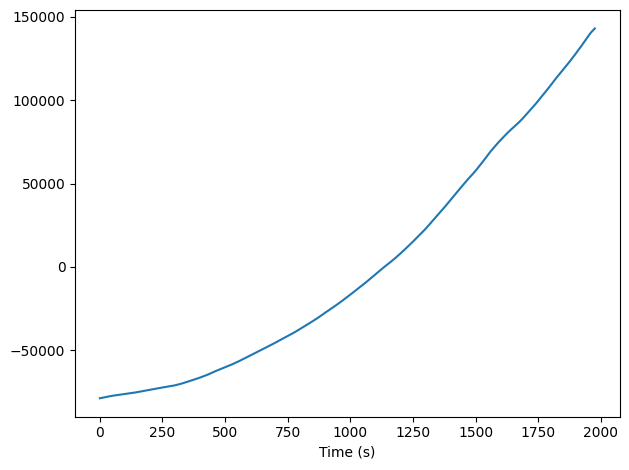

In [129]:
out_waveFB = in_waveFB.cumsum()
out_waveFB.unbias()
out_waveFB.plot()
decorate(xlabel = 'Time (s)')

Упражнение 9.2

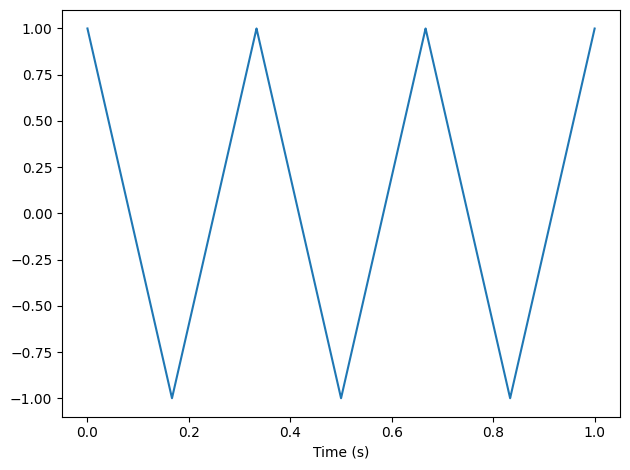

In [130]:
in_waveTriangle = TriangleSignal(freq = 3).make_wave(duration = 1, framerate = 44100)
in_waveTriangle.plot()
decorate(xlabel = 'Time (s)')

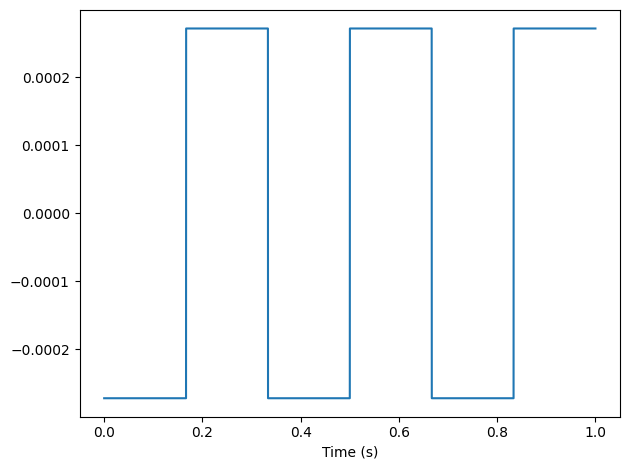

In [131]:
out_waveTriangle1 = in_waveTriangle.diff()
out_waveTriangle1.plot()
decorate(xlabel = 'Time (s)')
out_waveTriangle1.make_audio()

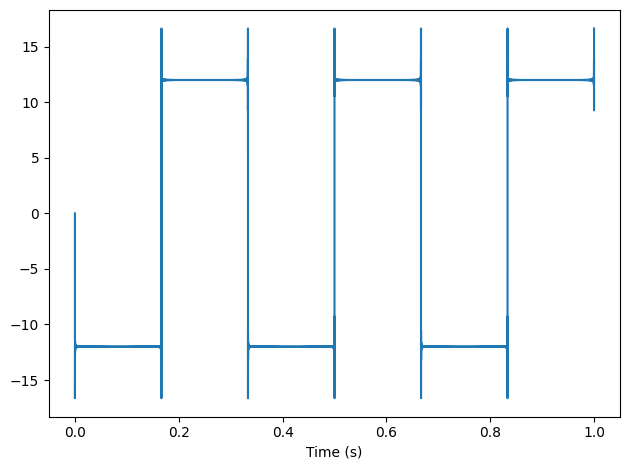

In [132]:
out_waveTriangle2 = in_waveTriangle.make_spectrum().differentiate().make_wave()
out_waveTriangle2.plot()
decorate(xlabel = 'Time (s)')
out_waveTriangle2.make_audio()

Стоит отметить, что различия спектральной производной от производной сигнала видны только на графиках. При прослушивании сигнала в данном случае различия выявлены не были.

Упражнение 9.3

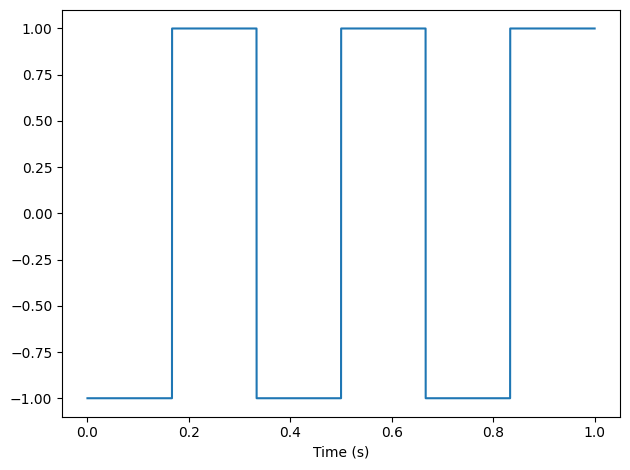

In [133]:
in_waveSquare = SquareSignal(freq = 3).make_wave(duration = 1, framerate = 44100)
in_waveSquare.plot()
decorate(xlabel = 'Time (s)')

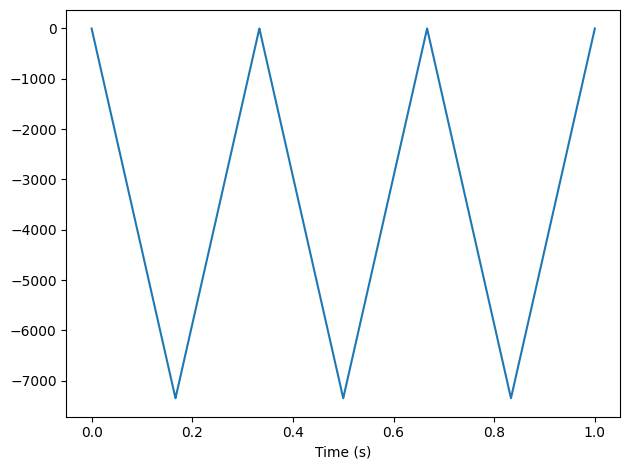

In [134]:
out_waveSquare1 = in_waveSquare.cumsum()
out_waveSquare1.plot()
decorate(xlabel = 'Time (s)')

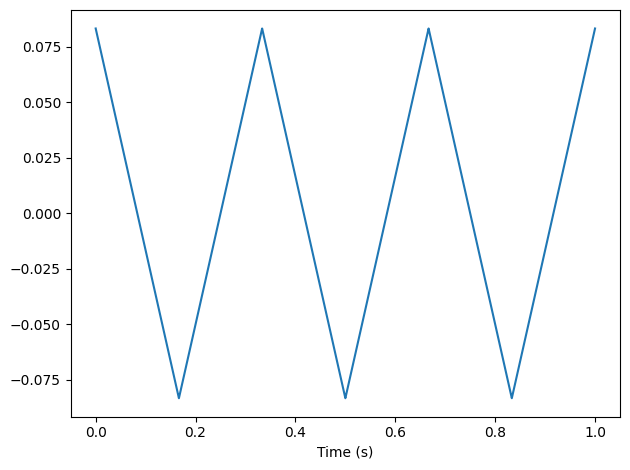

In [135]:
out_SpectrumSquare2 = in_waveSquare.make_spectrum().integrate()
out_SpectrumSquare2.hs[0] = 0
out_waveSquare2 = out_SpectrumSquare2.make_wave()
out_waveSquare2.plot()
decorate(xlabel = 'Time (s)')

По графикам видно, что сигналы различаются только по амплитуде и постоянной составляющей.

Упражнение 9.4

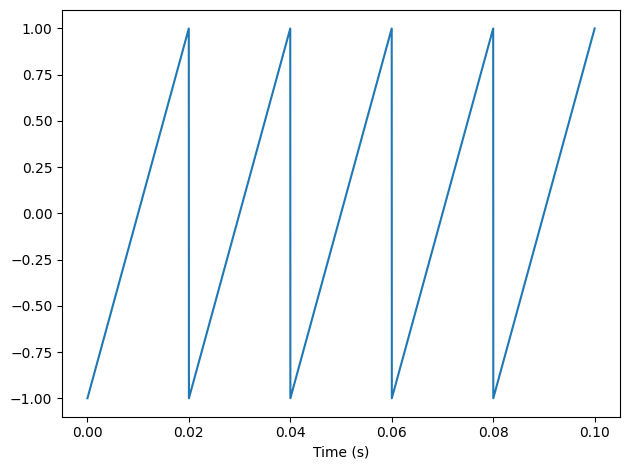

In [136]:
in_waveSaw.plot()
decorate(xlabel = 'Time (s)')

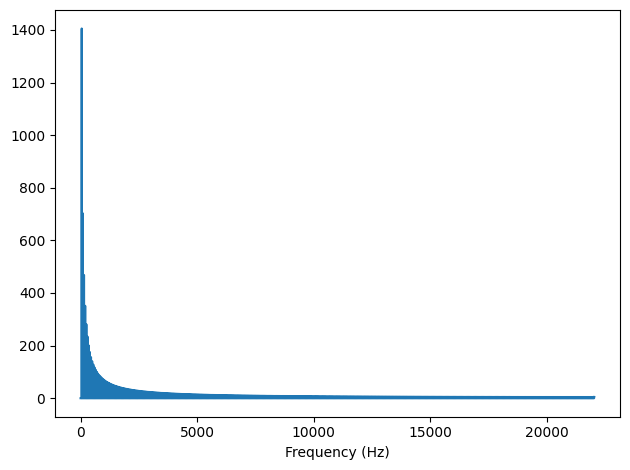

In [137]:
in_waveSpectrum = in_waveSaw.make_spectrum()
in_waveSpectrum.plot()
decorate(xlabel = 'Frequency (Hz)')

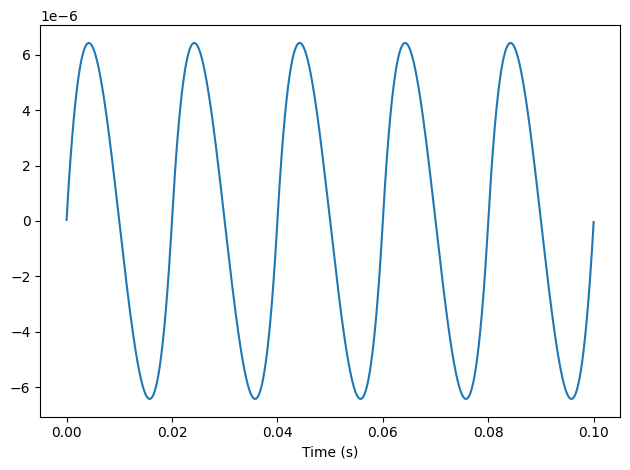

In [138]:
integeate = in_waveSpectrum.integrate().integrate()
integeate.hs[0] = 0
out_waveSaw = integeate.make_wave()
out_waveSaw.plot()
decorate(xlabel = 'Time (s)')

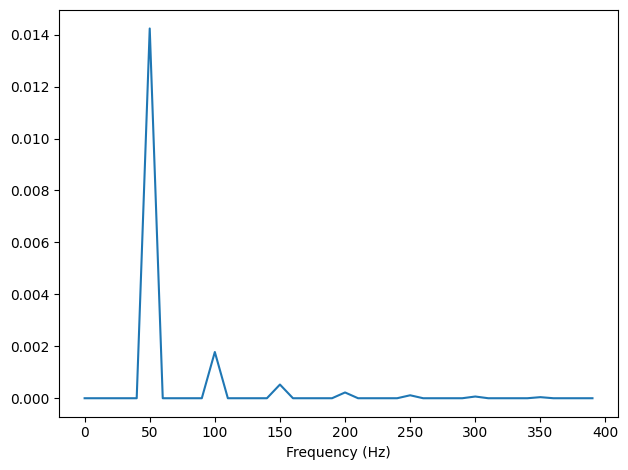

In [139]:
integeate.plot(high = 400)
decorate(xlabel = 'Frequency (Hz)')

Так как интегрирование действует как фильтр НЧ, то получается, что пилообразный сигнал потерял почти все свои высокачастотные компоненты, которые и отличают его от обычной синусойды.

Упражнение 9.5

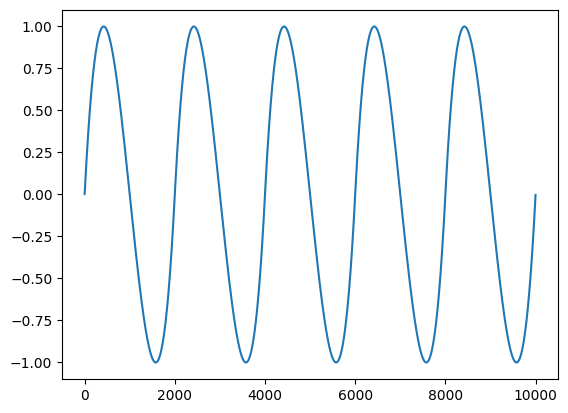

In [140]:
in_waveCubic = CubicSignal(freq = 0.0005).make_wave(duration = 10000, framerate = 1)
in_waveCubic.plot()

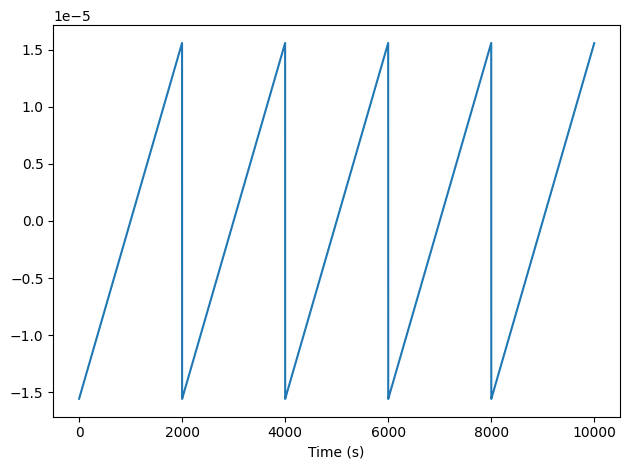

In [141]:
out_waveCubic = in_waveCubic.diff().diff()
out_waveCubic.plot()
decorate(xlabel = 'Time (s)')

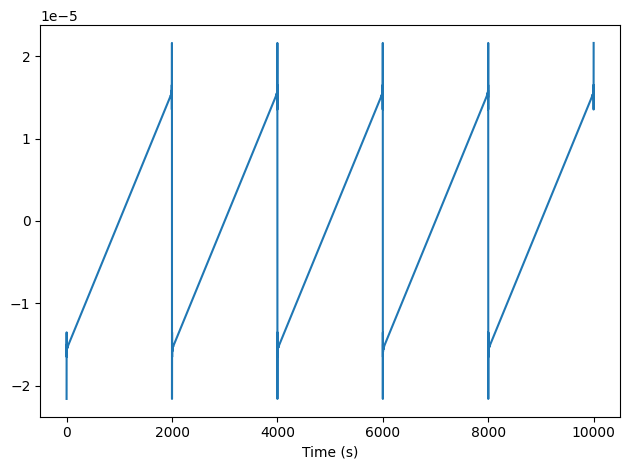

In [142]:
spectrum = in_waveCubic.make_spectrum().differentiate().differentiate()
out_waveCubic2 = spectrum.make_wave()
out_waveCubic2.plot()
decorate(xlabel = 'Time (s)')

Результаты аналогичны за исключением звона. Как говорит автор: это связано с тем, что производная параболического сигнала не определена в точках.

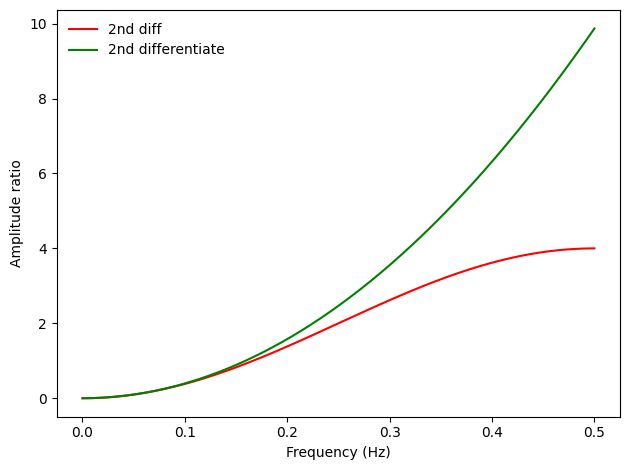

In [147]:
diff_window = np.array([-1.0, 2.0, -1.0])
padded = zero_pad(diff_window, len(in_waveCubic))
diff_wave = Wave(padded, framerate = in_waveCubic.framerate)
diff_filter = diff_wave.make_spectrum()

deriv_filter = in_waveCubic.make_spectrum()
deriv_filter.hs = (2 * np.pi * 1j * deriv_filter.fs) ** 2


diff_filter.plot(label = '2nd diff', color = "red")
deriv_filter.plot(label = '2nd differentiate', color = "green")
decorate(xlabel = 'Frequency (Hz)', ylabel = 'Amplitude ratio')

Оба получившихся фильтра можно назвать ФВЧ. Фильтр, соответствующий второй производной, лучше усиливает самые высокие частоты.